# Convolutional Neural Network (CNN) with Pytorch

In [ ]:
%pip install torch
%pip install torchvision

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:32<00:00, 5292852.54it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


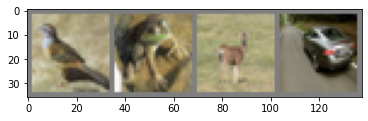

bird  frog  deer  car  


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [21]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [30]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.894
[1,  4000] loss: 0.931
[1,  6000] loss: 0.945
[1,  8000] loss: 0.926
[1, 10000] loss: 0.953
[1, 12000] loss: 0.945
[2,  2000] loss: 0.852
[2,  4000] loss: 0.899
[2,  6000] loss: 0.898
[2,  8000] loss: 0.918
[2, 10000] loss: 0.909
[2, 12000] loss: 0.926
[3,  2000] loss: 0.814
[3,  4000] loss: 0.858
[3,  6000] loss: 0.867
[3,  8000] loss: 0.877
[3, 10000] loss: 0.894
[3, 12000] loss: 0.894
[4,  2000] loss: 0.802
[4,  4000] loss: 0.821
[4,  6000] loss: 0.848
[4,  8000] loss: 0.851
[4, 10000] loss: 0.877
[4, 12000] loss: 0.864
[5,  2000] loss: 0.769
[5,  4000] loss: 0.793
[5,  6000] loss: 0.814
[5,  8000] loss: 0.812
[5, 10000] loss: 0.866
[5, 12000] loss: 0.867
[6,  2000] loss: 0.742
[6,  4000] loss: 0.759
[6,  6000] loss: 0.804
[6,  8000] loss: 0.838
[6, 10000] loss: 0.834
[6, 12000] loss: 0.828
[7,  2000] loss: 0.727
[7,  4000] loss: 0.756
[7,  6000] loss: 0.810
[7,  8000] loss: 0.771
[7, 10000] loss: 0.803
[7, 12000] loss: 0.796
[8,  2000] loss: 0.694
[8,  4000] 

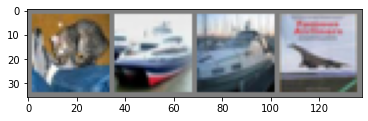

GroundTruth:  cat   ship  ship  plane


In [31]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [32]:
outputs = net(images)

In [33]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  plane


In [34]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


In [35]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 53.8 %
Accuracy for class: car   is 73.7 %
Accuracy for class: bird  is 50.2 %
Accuracy for class: cat   is 45.1 %
Accuracy for class: deer  is 58.1 %
Accuracy for class: dog   is 53.6 %
Accuracy for class: frog  is 73.4 %
Accuracy for class: horse is 67.0 %
Accuracy for class: ship  is 71.5 %
Accuracy for class: truck is 70.7 %
